## 1.1 seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

In [3]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [4]:
# 矢量图
%config InlineBackend.figure_format = 'svg'

In [5]:
tips_df = sns.load_dataset('tips') # 加载数据集, 该数据集包含了餐厅的消费数据
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


<Axes: xlabel='total_bill', ylabel='Count'>

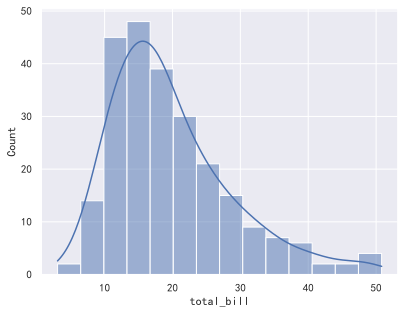

In [6]:
sns.histplot(data=tips_df, x='total_bill', kde=True) # kde: 是否显示核密度估计曲线

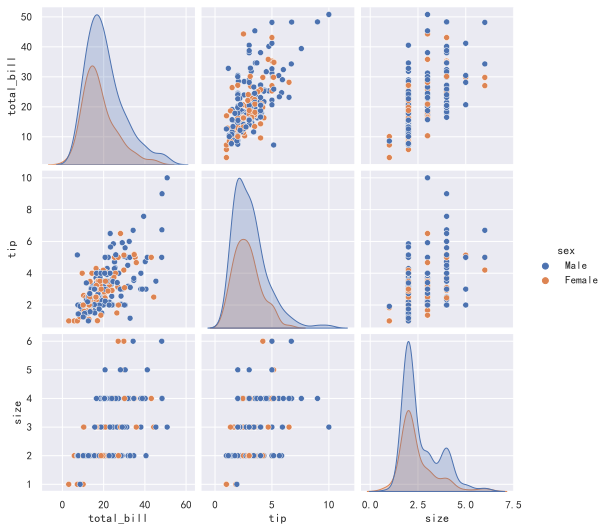

In [7]:
sns.pairplot(data=tips_df, hue='sex') # hue: 按照性别区分

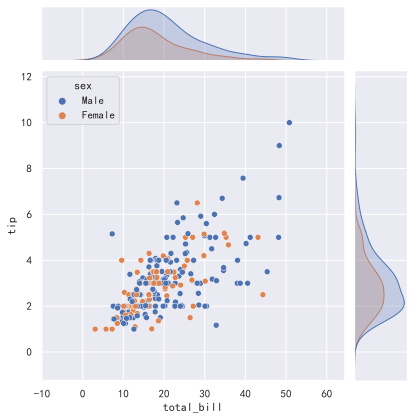

In [8]:
sns.jointplot(data=tips_df, x='total_bill', y='tip', hue='sex') # hue: 按照性别区分

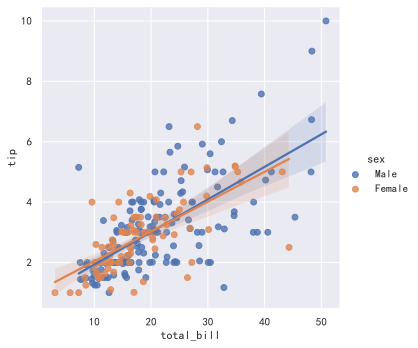

In [9]:
sns.lmplot(data=tips_df, x='total_bill', y='tip', hue='sex') # 该图是回归图

<Axes: xlabel='day', ylabel='total_bill'>

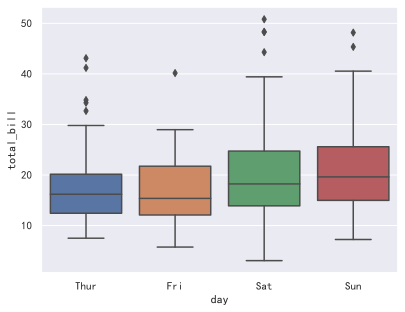

In [10]:
sns.boxplot(data=tips_df, x='day', y='total_bill') # 箱线图

<Axes: xlabel='day', ylabel='total_bill'>

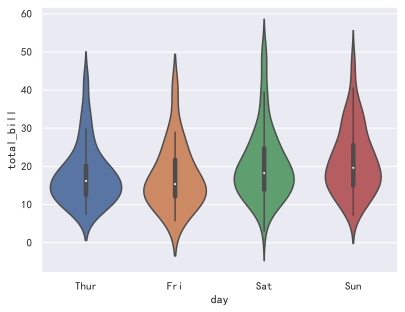

In [11]:
sns.violinplot(data=tips_df, x='day', y='total_bill') # 小提琴图

## 1.2 Pyecharts

In [1]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.commons.utils import JsCode
from pyecharts.globals import ThemeType

list2 = [
    {"value": 12, "percent": 12 / (12 + 3)},
    {"value": 23, "percent": 23 / (23 + 21)},
    {"value": 33, "percent": 33 / (33 + 5)},
    {"value": 3, "percent": 3 / (3 + 52)},
    {"value": 33, "percent": 33 / (33 + 43)},
]

list3 = [
    {"value": 3, "percent": 3 / (12 + 3)},
    {"value": 21, "percent": 21 / (23 + 21)},
    {"value": 5, "percent": 5 / (33 + 5)},
    {"value": 52, "percent": 52 / (3 + 52)},
    {"value": 43, "percent": 43 / (33 + 43)},
]


bar = Bar(init_opts=opts.InitOpts(theme=ThemeType.DARK))
bar.set_global_opts(title_opts=opts.TitleOpts(title="Bar-堆叠数据（全部）"), toolbox_opts=opts.ToolboxOpts(is_show=True))
bar.add_xaxis([1, 2, 3, 4, 5])
bar.add_yaxis("product1", list2, stack="stack1", category_gap="50%")
bar.add_yaxis("product2", list3, stack="stack1", category_gap="50%")
bar.set_series_opts(
    label_opts=opts.LabelOpts(
        position="right",
        formatter=JsCode(
            "function(x){return Number(x.data.percent * 100).toFixed() + '%';}"
        ),
    )
)
bar.render_notebook()
